<a href="https://www.kaggle.com/code/nishantpatel54/30day-stock-forecast-lstm?scriptVersionId=145406212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.0/928.0 kB 24.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for peewee: filename=peewee-3.16.3-cp310-cp310-linux_x86_64.whl size=314460 sha256=e3e181cc64e66b7ecf6cdc4a29da131483adf4c74a476cfc3f23ad10be599d98
  Stored in directory: /root/.cache/pip/wheels/c8/ac/6d/ad6d828725ffbe3abc508c95d25dd0c5fcc63539ae47913790
Successfully built peewee


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
ticker = 'TSLA'
lookback = 60
forecast = 30
dataset = yf.download(ticker, end='2023-06-02')
dataset_val = yf.download(ticker, start='2023-06-03')
train_set = dataset[['Close']].fillna(method='ffill')
train_set = train_set.values.reshape(-1,1)
val_set = dataset_val[['Close']].fillna(method='ffill').head(lookback+forecast)
val_set = val_set.values.reshape(-1,1)
val_set.shape, train_set.shape

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


((86, 1), (3254, 1))

In [3]:
sc = MinMaxScaler(feature_range=(0,1))
sc = sc.fit(train_set)
train_set_scaled = sc.transform(train_set)

sc_val = MinMaxScaler(feature_range=(0,1))
sc_val = sc_val.fit(val_set)
val_set_scaled = sc_val.transform(val_set)
val_set_scaled[:10], train_set_scaled[:10]

(array([[0.0272318 ],
        [0.07475906],
        [0.11663459],
        [0.24881178],
        [0.37135506],
        [0.44110469],
        [0.55517008],
        [0.53050749],
        [0.51907506],
        [0.57867705]]),
 array([[1.31893362e-03],
        [1.30915180e-03],
        [1.00428027e-03],
        [5.54310805e-04],
        [5.05407544e-05],
        [0.00000000e+00],
        [2.70634579e-04],
        [2.60852469e-04],
        [2.03792057e-04],
        [3.81495574e-04]]))

In [4]:
X_train=[]
y_train=[]
X_val=[]
y_val=[]

for i in range(lookback, len(train_set_scaled) - forecast + 1):
    X_train.append(train_set_scaled[i - lookback : i])
    y_train.append(train_set_scaled[i : i + forecast])

for i in range(lookback, len(val_set_scaled) - forecast + 1):
    X_val.append(val_set_scaled[i - lookback : i])
    y_val.append(val_set_scaled[i : i + forecast])
    
X_train=np.array(X_train)
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val = np.array(y_val)


In [5]:
#model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, 1)))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=50))
model.add(Dropout(rate=0.2))
model.add(Dense(forecast))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            2

In [6]:
#train

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
99/99 [==============================] - 27s 178ms/step - loss: 0.0142
Epoch 2/100
99/99 [==============================] - 18s 177ms/step - loss: 0.0067
Epoch 3/100
99/99 [==============================] - 18s 179ms/step - loss: 0.0054
Epoch 4/100
99/99 [==============================] - 17s 175ms/step - loss: 0.0046
Epoch 5/100
99/99 [==============================] - 18s 177ms/step - loss: 0.0045
Epoch 6/100
99/99 [==============================] - 18s 178ms/step - loss: 0.0040
Epoch 7/100
99/99 [==============================] - 18s 177ms/step - loss: 0.0037
Epoch 8/100
99/99 [==============================] - 18s 177ms/step - loss: 0.0037
Epoch 9/100
99/99 [==============================] - 17s 175ms/step - loss: 0.0036
Epoch 10/100
99/99 [==============================] - 17s 177ms/step - loss: 0.0033
Epoch 11/100
99/99 [==============================] - 17s 173ms/step - loss: 0.0033
Epoch 12/100
99/99 [==============================] - 17s 175ms/step - loss: 0.0033
E

In [7]:
X_ = train_set_scaled[-lookback:]
X_ = X_.reshape(1, lookback, 1)

y_ = model.predict(X_).reshape(-1,1)
y_ = sc.inverse_transform(y_)

dataset_past = dataset[['Close']].reset_index()
dataset_past.rename(columns={'index':'Date','Close':'Actual'},inplace=True)
dataset_past['Date'] = pd.to_datetime(dataset_past['Date'])
dataset_past['Forecast'] = np.nan
dataset_past['Forecast'].iloc[-1] = dataset_past['Actual'].iloc[-1]

dataset_future = pd.DataFrame(columns=['Date','Actual','Forecast'])
dataset_future['Date'] = pd.date_range(start=dataset_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods = forecast)
dataset_future['Actual'] = np.nan
dataset_future['Forecast'] = y_.flatten()
dataset_past, dataset_future

actual_preds = pd.concat([dataset_past[-100:], dataset_future], ignore_index=True)
actual_preds=actual_preds.set_index('Date')
actual_preds

1/1 [==============================] - 2s 2s/step


/tmp/ipykernel_20/2238193700.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_past['Forecast'].iloc[-1] = dataset_past['Actual'].iloc[-1]


,Actual,Forecast
Date,,
2023-01-09,119.769997,NaN
2023-01-10,118.849998,NaN
2023-01-11,123.220001,NaN
2023-01-12,123.559998,NaN
2023-01-13,122.400002,NaN
...,...,...
2023-06-27,NaN,200.988235
2023-06-28,NaN,202.739609
2023-06-29,NaN,203.687393


                Actual    Forecast
Date                              
2023-01-09  119.769997         NaN
2023-01-10  118.849998         NaN
2023-01-11  123.220001         NaN
2023-01-12  123.559998         NaN
2023-01-13  122.400002         NaN
...                ...         ...
2023-05-25  184.470001         NaN
2023-05-26  193.169998         NaN
2023-05-30  201.160004         NaN
2023-05-31  203.929993         NaN
2023-06-01  207.520004  207.520004

[100 rows x 2 columns]
              Forecast
Date                  
2023-06-02  203.677551
2023-06-03  202.449692
2023-06-04  202.216019
2023-06-05  201.623184
2023-06-06  201.122955
2023-06-07  202.570679
2023-06-08  202.854279
2023-06-09  201.339615
2023-06-10  201.510452
2023-06-11  200.552216
2023-06-12  201.036118
2023-06-13  200.743393
2023-06-14  201.064148
2023-06-15  200.244339
2023-06-16  199.599274
2023-06-17  200.145065
2023-06-18  199.420486
2023-06-19  199.972610
2023-06-20  199.108368
2023-06-21  200.251495
2023-06-22  200

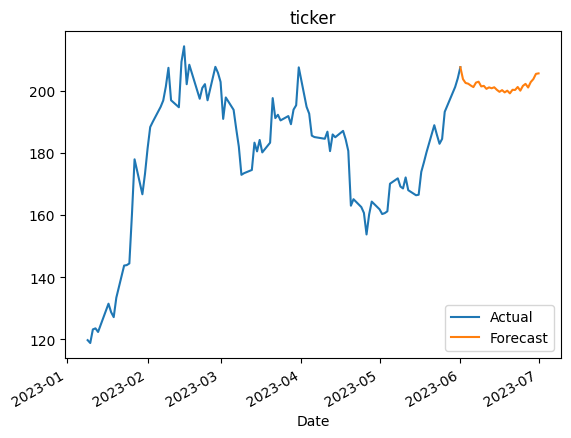

In [8]:
actual_preds.plot(title='ticker')
print(actual_preds[:-forecast])
print(actual_preds[-forecast:].drop('Actual',axis='columns'))

,30day History,Forecast
Date,,
2023-06-05,217.610001,203.677551
2023-06-06,221.309998,202.449692
2023-06-07,224.570007,202.216019
2023-06-08,234.860001,201.623184
2023-06-09,244.399994,201.122955
2023-06-12,249.830002,202.570679
2023-06-13,258.709991,202.854279
2023-06-14,256.790009,201.339615
2023-06-15,255.899994,201.510452


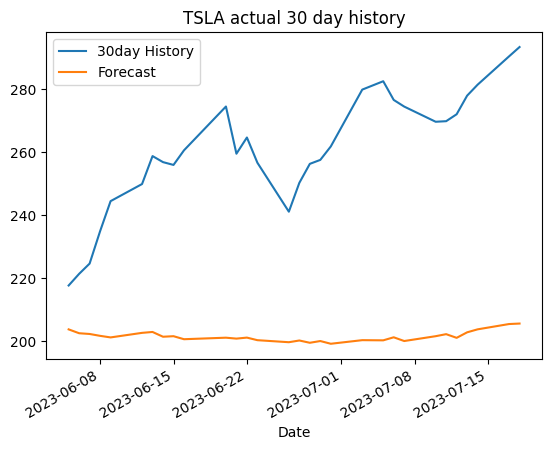

In [9]:
dataset_future_actual = dataset_val[['Close']].reset_index().head(forecast)
dataset_future_actual.rename(columns={'index':'Date','Close':'30day History'},inplace=True)
dataset_future_actual['Date'] = pd.to_datetime(dataset_future_actual['Date'])
dataset_future_actual['Forecast'] = np.nan
dataset_future_actual = dataset_future_actual.set_index('Date')
dataset_future_actual = dataset_future_actual.drop('Forecast',axis='columns')
dataset_future_actual['Forecast'] = y_.flatten()
dataset_future_actual.plot(title=ticker+' actual 30 day history')
dataset_future_actual
